In [1]:
import logging
logging.getLogger().setLevel(logging.ERROR)
from pathlib import Path
from collections import defaultdict

import numpy as np
from scipy import stats
from tqdm import tqdm
from matplotlib import pyplot as plt

from docembedder.preprocessor.preprocessor import Preprocessor
from docembedder.analysis import get_model_correlations, classification_benchmark
from docembedder import BERTEmbedder, TfidfEmbedder, D2VEmbedder, BPembEmbedder

In [2]:
data_dir = Path("..", "data")
unprocessed_dir = data_dir / "unprocessed"

In [3]:
prep = Preprocessor(log_level=logging.ERROR)

In [13]:
models = {
    "tfidf": TfidfEmbedder(stem=False),
#    "tfidf-stem": TfidfEmbedder(stem=True),
#    "tfidf-bigram": TfidfEmbedder(ngram_max=2),
#    "tfidf-nostop": TfidfEmbedder(stop_words=None),
    "tfidf-mindf2": TfidfEmbedder(min_df=2, norm="l1"),
    "tfidf-mindf3": TfidfEmbedder(min_df=3, norm="l1"),
    "tfidf-mindf4": TfidfEmbedder(min_df=4, norm="l1"),
    "tfidf-mindf5": TfidfEmbedder(min_df=5, norm="l1"),
    "tfidf-norml1": TfidfEmbedder(norm="l1"),
#    "tfidf-maxdf9": TfidfEmbedder(max_df=0.9, norm="l1"),
#    "tfidf-maxdf95": TfidfEmbedder(max_df=0.95, norm="l1"),
#    "tfidf-maxdf8": TfidfEmbedder(max_df=0.8),
#    "tfidf-sublin": TfidfEmbedder(sublinear_tf=True),
    
#    "rfidf-norml1-mindf4": TfidfEmbedder(min_df=4, norm="l1"),
}

In [14]:
%%time
all_results = defaultdict(lambda: [])
all_years = []
n_patent_sample = 4000
n_class_sample = 50000
start_year, end_year = 1860, 1920

for fp in tqdm(list(unprocessed_dir.glob("*.xz"))):
    year = int(fp.stem)
    if year < start_year or year > end_year:
        continue
    patents, prep_stats = prep.preprocess_file(fp)
    if year == 0 or len(patents) < 100:
        continue

    results = classification_benchmark(patents, models, n_patents=n_patent_sample,
                                       n_class_sample=n_class_sample)
    all_years.append(year)
    for model_name, res in results.items():
        all_results[model_name].append(res)

100%|████████████████████████████████████████████████████| 114/114 [3:33:29<00:00, 112.36s/it]

CPU times: user 3h 34min 27s, sys: 56.3 s, total: 3h 35min 23s
Wall time: 3h 33min 29s


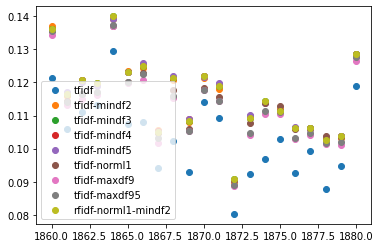

In [11]:
for model_name, res in all_results.items():
    plt.scatter(all_years, res, label=model_name)
plt.legend()
plt.show()

In [12]:
{name: np.mean(data) for name, data in all_results.items()}

{'tfidf': 0.1035547741579215,
 'tfidf-mindf2': 0.11554050694449566,
 'tfidf-mindf3': 0.11571586653726146,
 'tfidf-mindf4': 0.11572131256936952,
 'tfidf-mindf5': 0.11570363415025833,
 'tfidf-norml1': 0.11423036364035206,
 'tfidf-maxdf9': 0.11240564204592304,
 'tfidf-maxdf95': 0.11312234687940864,
 'rfidf-norml1-mindf2': 0.11571586653726146}